
### **Pulse Code Modulation**

### **Pulse code modulation:** Pulse code modulation is a digital scheme for transmitting analog data. It converts an analog signal into digital form. Using PCM, it is possible to digitize all forms of analog data, including full-motion video, voice, music, telemetry, etc.

In [ ]:

#Modulation
fs=1000
T=1/fs
L=5001
t=np.linspace(0,L-1,L)*T

#input Signal
f0=1
sig0=(1+np.sin(2*np.pi*f0*t))/2
    
#Quantization
q=8
sig1=np.array(np.round(sig0*q))
sig1=np.int_(sig1)

#Binary Encoding and binary to serial converter
v=4
tx=np.empty(L,dtype=object)

for i in range(L):
    tx[i]=np.binary_repr(sig1[i], width=v)


#Demodulation
sig2=np.empty(L,dtype=object)
  
for i in range(L):
    sig2[i]=int(tx[i],2)
    
sig2=sig2/q
    
#Low Pass Filter
cutoff=f0
fs=fs
order=5
nyq = 0.5 * fs
normal_cutoff = cutoff / nyq

b, a = butter(order, normal_cutoff, btype='low', analog=False)
sig3 = 1-lfilter(b, a, sig2)

Binary Serial Output
['0100' '0100' '0100' ... '0100' '0100' '0100']


Text(0.5, 0, 'Time')

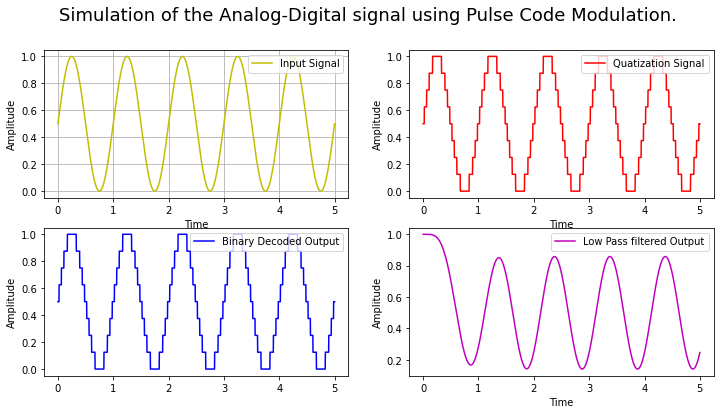

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
fig.suptitle('Simulation of the Analog-Digital signal using Pulse Code Modulation.', fontsize=18)


ax[0, 0].plot(t,sig0,label='Input Signal', color='y')
ax[0, 0].grid()
ax[0, 0].legend(loc='upper right')
ax[0, 0].set_ylabel("Amplitude")
ax[0 ,0].set_xlabel("Time")


ax[0, 1].plot(t,np.abs(sig1/q),label='Quatization Signal', color='r')
ax[0, 1].legend(loc='upper right')
ax[0, 1].set_ylabel("Amplitude")
ax[0 ,1].set_xlabel("Time")


print('Binary Serial Output')
print(tx)


ax[1, 0].plot(t,sig2,label='Binary Decoded Output', color='b')
ax[1, 0].legend(loc='upper right')
ax[1, 0].set_ylabel("Amplitude")


ax[-1 ,-1].plot(t,sig3,label='Low Pass filtered Output', color='m')
ax[-1 ,-1].legend(loc='upper right')
ax[-1 ,-1].set_ylabel("Amplitude")
ax[-1 ,-1].set_xlabel("Time")

